 ## T20 World Cup Cricket Match Score Predictor - Feature-extraction & Model Building
 
 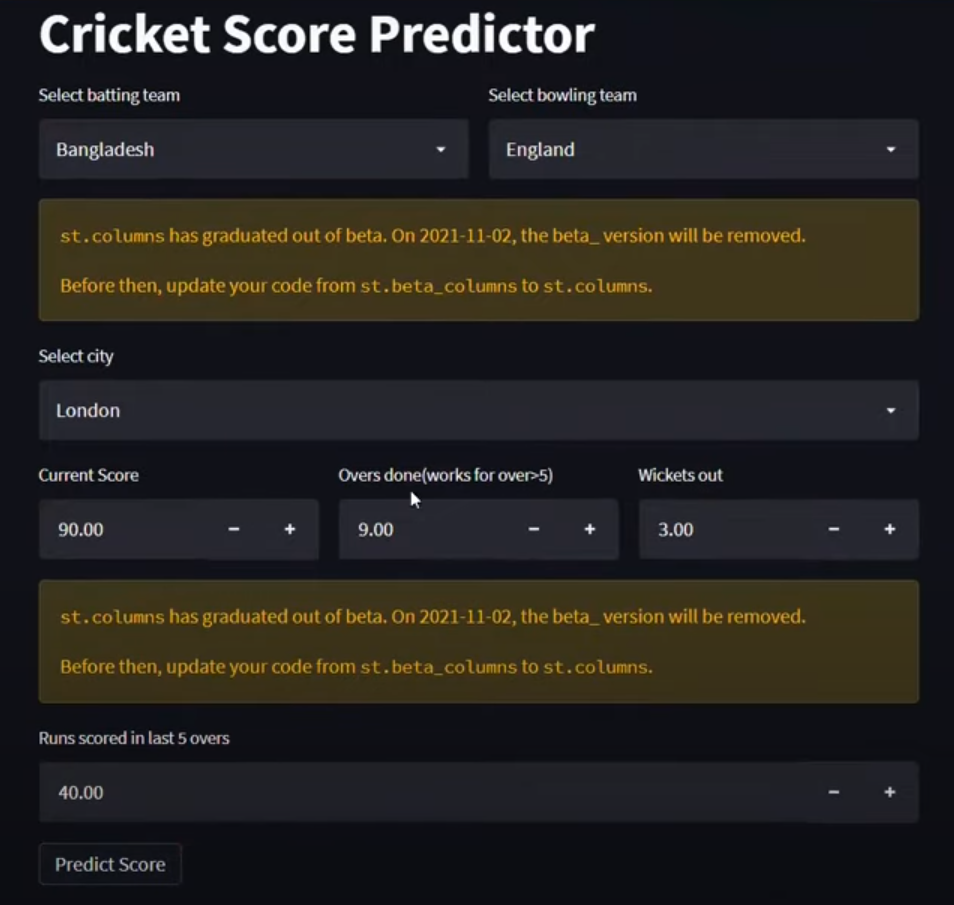

In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
df = pickle.load(open('dataset_level2.pkl','rb'))

In [3]:
df
# batting_team
# bowling team
# city
# current score
# ball left
# wickets left
# current rr
# last five

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [4]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [5]:
df['city'].isnull()

0       True
1       True
2       True
3       True
4       True
       ...  
121    False
122    False
123    False
124    False
125    False
Name: city, Length: 63888, dtype: bool

In [6]:
df[df['city'].isnull()]

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
118,963,Australia,Sri Lanka,19.2,1,0,NaN,Pallekele International Cricket Stadium
119,963,Australia,Sri Lanka,19.3,4,0,NaN,Pallekele International Cricket Stadium
120,963,Australia,Sri Lanka,19.4,4,0,NaN,Pallekele International Cricket Stadium
121,963,Australia,Sri Lanka,19.5,6,0,NaN,Pallekele International Cricket Stadium


In [7]:
df[df['city'].isnull()]['venue']

0                     Melbourne Cricket Ground
1                     Melbourne Cricket Ground
2                     Melbourne Cricket Ground
3                     Melbourne Cricket Ground
4                     Melbourne Cricket Ground
                        ...                   
118    Pallekele International Cricket Stadium
119    Pallekele International Cricket Stadium
120    Pallekele International Cricket Stadium
121    Pallekele International Cricket Stadium
122    Pallekele International Cricket Stadium
Name: venue, Length: 8548, dtype: object

In [8]:
df[df['city'].isnull()]['venue'].value_counts()

Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

In [9]:
np.where(df['city'].isnull())

(array([    0,     1,     2, ..., 63759, 63760, 63761], dtype=int64),)

In [10]:
df['venue'].str.split()

0      [Melbourne, Cricket, Ground]
1      [Melbourne, Cricket, Ground]
2      [Melbourne, Cricket, Ground]
3      [Melbourne, Cricket, Ground]
4      [Melbourne, Cricket, Ground]
                   ...             
121         [R, Premadasa, Stadium]
122         [R, Premadasa, Stadium]
123         [R, Premadasa, Stadium]
124         [R, Premadasa, Stadium]
125         [R, Premadasa, Stadium]
Name: venue, Length: 63888, dtype: object

In [11]:
df['venue'].str.split().apply(lambda x:x[0])

0      Melbourne
1      Melbourne
2      Melbourne
3      Melbourne
4      Melbourne
         ...    
121            R
122            R
123            R
124            R
125            R
Name: venue, Length: 63888, dtype: object

In [12]:
np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

array(['Melbourne', 'Melbourne', 'Melbourne', ..., 'Colombo', 'Colombo',
       'Colombo'], dtype=object)

In [13]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [14]:
df['city'] = cities

In [15]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [16]:
df.drop(columns=['venue'],inplace=True)

In [17]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo
122,964,Sri Lanka,Australia,19.4,0,0,Colombo
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
124,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [18]:
df['city'].value_counts()

Colombo          4086
Mirpur           3420
Johannesburg     3331
Dubai            2969
Auckland         2532
                 ... 
Nairobi           123
Potchefstroom     122
Dharamsala        122
Ahmedabad         121
Carrara            64
Name: city, Length: 86, dtype: int64

In [19]:
df['city'].value_counts()[df['city'].value_counts() > 600]

Colombo            4086
Mirpur             3420
Johannesburg       3331
Dubai              2969
Auckland           2532
Cape Town          2369
London             2106
Pallekele          2066
Barbados           2050
Sydney             1579
Melbourne          1574
Durban             1520
St Lucia           1487
Wellington         1350
Lauderhill         1238
Hamilton           1219
Centurion          1189
Manchester         1144
Abu Dhabi          1099
Mumbai              995
Nottingham          991
Southampton         987
Mount Maunganui     938
Chittagong          868
Kolkata             844
Lahore              748
Delhi               739
Nagpur              735
Chandigarh          627
Adelaide            623
Bangalore           620
St Kitts            618
Cardiff             615
Christchurch        614
Trinidad            611
Name: city, dtype: int64

In [20]:
df['city'].value_counts()[df['city'].value_counts() > 600].shape

(35,)

In [21]:
df['city'].value_counts()[df['city'].value_counts() > 600].sum()

50501

In [22]:
df['city'].value_counts()[df['city'].value_counts() > 600].index

Index(['Colombo', 'Mirpur', 'Johannesburg', 'Dubai', 'Auckland', 'Cape Town',
       'London', 'Pallekele', 'Barbados', 'Sydney', 'Melbourne', 'Durban',
       'St Lucia', 'Wellington', 'Lauderhill', 'Hamilton', 'Centurion',
       'Manchester', 'Abu Dhabi', 'Mumbai', 'Nottingham', 'Southampton',
       'Mount Maunganui', 'Chittagong', 'Kolkata', 'Lahore', 'Delhi', 'Nagpur',
       'Chandigarh', 'Adelaide', 'Bangalore', 'St Kitts', 'Cardiff',
       'Christchurch', 'Trinidad'],
      dtype='object')

In [23]:
## 

In [24]:
df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

['Colombo',
 'Mirpur',
 'Johannesburg',
 'Dubai',
 'Auckland',
 'Cape Town',
 'London',
 'Pallekele',
 'Barbados',
 'Sydney',
 'Melbourne',
 'Durban',
 'St Lucia',
 'Wellington',
 'Lauderhill',
 'Hamilton',
 'Centurion',
 'Manchester',
 'Abu Dhabi',
 'Mumbai',
 'Nottingham',
 'Southampton',
 'Mount Maunganui',
 'Chittagong',
 'Kolkata',
 'Lahore',
 'Delhi',
 'Nagpur',
 'Chandigarh',
 'Adelaide',
 'Bangalore',
 'St Kitts',
 'Cardiff',
 'Christchurch',
 'Trinidad']

In [25]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

In [26]:
df = df[df['city'].isin(eligible_cities)]

In [27]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo
122,964,Sri Lanka,Australia,19.4,0,0,Colombo
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
124,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [28]:
df.groupby('match_id').cumsum()

,ball,runs
0,0.1,0
1,0.3,0
2,0.6,1
3,1.0,3
4,1.5,3
...,...,...
121,1192.1,125
122,1211.5,125
123,1231.0,125
124,1250.6,127


In [29]:
df.groupby('match_id').cumsum()['runs']

0        0
1        0
2        1
3        3
4        3
      ... 
121    125
122    125
123    125
124    127
125    128
Name: runs, Length: 50501, dtype: int64

In [30]:
df['current_score'] = df.groupby('match_id').cumsum()['runs']

C:\Users\USER\AppData\Local\Temp/ipykernel_13508/1598928411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_score'] = df.groupby('match_id').cumsum()['runs']


In [31]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3
...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127


In [32]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])
df

C:\Users\USER\AppData\Local\Temp/ipykernel_13508/2777558413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
C:\Users\USER\AppData\Local\Temp/ipykernel_13508/2777558413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


In [33]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')
df

C:\Users\USER\AppData\Local\Temp/ipykernel_13508/562775579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120


In [34]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df

C:\Users\USER\AppData\Local\Temp/ipykernel_13508/2304996896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = 120 - df['balls_bowled']
C:\Users\USER\AppData\Local\Temp/ipykernel_13508/2304996896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [35]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']
df['wickets_left'] = 10 - df['player_dismissed']

C:\Users\USER\AppData\Local\Temp/ipykernel_13508/540685528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
C:\Users\USER\AppData\Local\Temp/ipykernel_13508/540685528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].astype('int')
C:\Users\USER\AppData\Local\Temp/ipykernel_13508/540685528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [36]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [37]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

C:\Users\USER\AppData\Local\Temp/ipykernel_13508/914577034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crr'] = (df['current_score']*6)/df['balls_bowled']


In [38]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


In [39]:
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())

In [40]:
last_five

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 43.0,
 44.0,
 45.0,
 44.0,
 42.0,
 43.0,
 41.0,
 41.0,
 41.0,
 42.0,
 42.0,
 39.0,
 38.0,
 39.0,
 38.0,
 39.0,
 40.0,
 37.0,
 41.0,
 42.0,
 42.0,
 44.0,
 44.0,
 40.0,
 39.0,
 37.0,
 35.0,
 31.0,
 27.0,
 26.0,
 31.0,
 31.0,
 30.0,
 31.0,
 31.0,
 32.0,
 31.0,
 31.0,
 36.0,
 37.0,
 37.0,
 37.0,
 37.0,
 36.0,
 36.0,
 36.0,
 36.0,
 35.0,
 32.0,
 32.0,
 31.0,
 29.0,
 29.0,
 31.0,
 32.0,
 32.0,
 32.0,
 33.0,
 36.0,
 37.0,
 37.0,
 39.0,
 41.0,
 40.0,
 41.0,
 41.0,
 42.0,
 44.0,
 39.0,
 43.0,
 45.0,
 48.0,
 48.0,
 48.0,
 49.0,
 49.0,
 49.0,
 51.0,
 51.0,
 51.0,
 52.0,
 52.0,
 53.0,
 53.0,
 53.0,
 54.0,
 53.0,
 52.0,
 50.0,
 53.0,
 47.0,
 46.0,
 45.0,
 46.0,
 47.0,
 49.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [41]:
df['last_five'] = last_five

C:\Users\USER\AppData\Local\Temp/ipykernel_13508/1595651733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_five'] = last_five


In [42]:
df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five']]

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
0,Australia,Sri Lanka,Melbourne,0,119,10,0.000000,NaN
1,Australia,Sri Lanka,Melbourne,0,118,10,0.000000,NaN
2,Australia,Sri Lanka,Melbourne,1,117,10,2.000000,NaN
3,Australia,Sri Lanka,Melbourne,3,116,10,4.500000,NaN
4,Australia,Sri Lanka,Melbourne,3,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...
121,Sri Lanka,Australia,Colombo,125,3,2,6.410256,32.0
122,Sri Lanka,Australia,Colombo,125,2,2,6.355932,32.0
123,Sri Lanka,Australia,Colombo,125,1,1,6.302521,32.0
124,Sri Lanka,Australia,Colombo,127,0,1,6.350000,33.0


In [43]:
df.groupby('match_id').sum()['runs']

match_id
2      168
4      187
10     195
11     194
12     185
      ... 
958    129
960    150
961    120
963    263
964    128
Name: runs, Length: 416, dtype: int64

In [44]:
df.groupby('match_id').sum()['runs'].reset_index()

,match_id,runs
0,2,168
1,4,187
2,10,195
3,11,194
4,12,185
...,...,...
411,958,129
412,960,150
413,961,120
414,963,263


In [45]:
df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

,match_id,runs_x,batting_team,bowling_team,ball,runs_y,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,2,168,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,2,168,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,2,168,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,2,168,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,2,168,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,964,128,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
50497,964,128,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
50498,964,128,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
50499,964,128,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


In [46]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

In [47]:
final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
0,Australia,Sri Lanka,Melbourne,0,119,10,0.000000,NaN,168
1,Australia,Sri Lanka,Melbourne,0,118,10,0.000000,NaN,168
2,Australia,Sri Lanka,Melbourne,1,117,10,2.000000,NaN,168
3,Australia,Sri Lanka,Melbourne,3,116,10,4.500000,NaN,168
4,Australia,Sri Lanka,Melbourne,3,115,10,3.600000,NaN,168
...,...,...,...,...,...,...,...,...,...
50496,Sri Lanka,Australia,Colombo,125,3,2,6.410256,32.0,128
50497,Sri Lanka,Australia,Colombo,125,2,2,6.355932,32.0,128
50498,Sri Lanka,Australia,Colombo,125,1,1,6.302521,32.0,128
50499,Sri Lanka,Australia,Colombo,127,0,1,6.350000,33.0,128


In [48]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [49]:
final_df.isnull().sum()

batting_team         0
bowling_team         0
city                 0
current_score        0
balls_left           0
wickets_left         0
crr                  0
last_five        12024
runs_x               0
dtype: int64

In [50]:
final_df.dropna(inplace=True)

In [51]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [52]:
final_df.sample(final_df.shape[0])

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
16624,Pakistan,Sri Lanka,Johannesburg,134,29,7,8.835165,63.0,189
19725,England,West Indies,Trinidad,94,45,6,7.520000,33.0,121
4609,India,New Zealand,Delhi,181,8,8,9.696429,63.0,202
7524,Bangladesh,West Indies,St Kitts,98,57,5,9.333333,54.0,143
28833,Pakistan,South Africa,Abu Dhabi,80,51,6,6.956522,36.0,119
...,...,...,...,...,...,...,...,...,...
23330,New Zealand,Sri Lanka,Colombo,111,26,7,7.085106,38.0,141
15212,West Indies,England,London,88,66,9,9.777778,41.0,208
37552,West Indies,England,Barbados,169,1,7,8.521008,54.0,170
6771,Pakistan,South Africa,Centurion,89,57,8,8.476190,42.0,168


In [53]:
final_df = final_df.sample(final_df.shape[0])

In [54]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
44673,South Africa,Australia,Cape Town,143,16,7,8.250000,39.0,178
32873,South Africa,Australia,Colombo,32,88,8,6.000000,32.0,146
38173,Sri Lanka,Pakistan,Dubai,82,41,7,6.227848,29.0,145
19145,South Africa,Bangladesh,Johannesburg,112,43,5,8.727273,40.0,118
31950,India,England,Colombo,117,27,8,7.548387,36.0,170
...,...,...,...,...,...,...,...,...,...
5798,Sri Lanka,Bangladesh,Colombo,98,60,9,9.800000,36.0,214
7361,Australia,India,Sydney,41,90,10,8.200000,40.0,164
15894,India,Pakistan,Durban,128,12,3,7.111111,44.0,141
6781,Pakistan,South Africa,Centurion,94,47,5,7.726027,33.0,168


In [55]:
final_df.sample(5)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
31043,England,Pakistan,Abu Dhabi,62,60,7,6.200000,28.0,129
23529,West Indies,Australia,Sydney,50,73,8,6.382979,35.0,138
36441,Australia,Sri Lanka,Sydney,97,33,7,6.689655,40.0,137
50232,Bangladesh,India,Mirpur,78,48,5,6.500000,31.0,120
2673,Pakistan,West Indies,Trinidad,47,62,7,4.862069,27.0,132


In [56]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [57]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
10624,New Zealand,England,Christchurch,107,28,6,6.978261,34.0
28694,India,England,Manchester,75,63,9,7.894737,36.0
50132,Sri Lanka,Pakistan,Mirpur,117,25,9,7.389474,40.0
22275,New Zealand,West Indies,Hamilton,50,88,10,9.375000,49.0
47869,New Zealand,Pakistan,Chandigarh,44,89,10,8.516129,44.0
...,...,...,...,...,...,...,...,...
48658,England,Sri Lanka,Delhi,96,33,7,6.620690,32.0
20444,Sri Lanka,West Indies,Nottingham,80,71,10,9.795918,45.0
26740,Pakistan,England,Cardiff,63,56,7,5.906250,19.0
2106,New Zealand,England,Wellington,181,5,6,9.443478,52.0


In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [59]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [60]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [61]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9882668046105779
1.6617009773571625


In [62]:
pickle.dump(pipe,open('pipe.pkl','wb'))